In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## keypoints using MP holistic

In [4]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    while cap.isOpened():
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        # print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        cv2.imshow("Feed", image)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

cap.release()
cv2.destroyAllWindows()

In [8]:
results.face_landmarks

landmark {
  x: 0.4372555613517761
  y: 0.4163404107093811
  z: -0.004786322824656963
}
landmark {
  x: 0.44555267691612244
  y: 0.39108729362487793
  z: -0.0403326079249382
}
landmark {
  x: 0.4392014145851135
  y: 0.3957826495170593
  z: -0.013596868142485619
}
landmark {
  x: 0.43440282344818115
  y: 0.34870901703834534
  z: -0.04412483423948288
}
landmark {
  x: 0.44640737771987915
  y: 0.3802790641784668
  z: -0.04649866744875908
}
landmark {
  x: 0.4450283348560333
  y: 0.36270442605018616
  z: -0.0480523444712162
}
landmark {
  x: 0.4388660788536072
  y: 0.31538814306259155
  z: -0.04111018404364586
}
landmark {
  x: 0.36152446269989014
  y: 0.3072247803211212
  z: -0.024768203496932983
}
landmark {
  x: 0.43724218010902405
  y: 0.2835577726364136
  z: -0.04648244008421898
}
landmark {
  x: 0.43755537271499634
  y: 0.2673203647136688
  z: -0.05471941828727722
}
landmark {
  x: 0.4339141547679901
  y: 0.1953895390033722
  z: -0.06879517436027527
}
landmark {
  x: 0.43664187192916

In [9]:
draw_landmarks(frame, results)

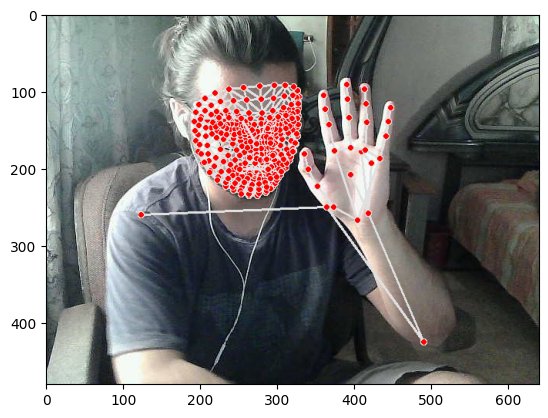

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## Extract Keywords

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [6]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

NameError: name 'results' is not defined

In [14]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [8]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [8]:
result_test = extract_keypoints(results)

NameError: name 'results' is not defined

In [17]:
result_test

array([ 0.42711878,  0.35197753, -1.44793868, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.42711878,  0.35197753, -1.44793868, ...,  0.        ,
        0.        ,  0.        ])

## Setup folders for Collection

In [9]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array([
    'Good morning', 
    'How are you', 
    'I am fine', 
    'Thank you', 
    'What is your name', 
    'Nice to meet you', 
    'Can you help me', 
    'Listen to me'
   
])

# Thirty videos worth of data
no_sequences = 40


# Videos are going to be 30 frames in length
sequence_length = 40

# Folder start
start_folder = 40 

In [15]:
# for action in actions:
#     for sequence in range(no_sequences):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
#         except:
#             pass

## Collect keypoint values for training and testing

In [32]:
for action in actions[4:5]:
    print(action)

What is your name


In [33]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions[4:5]:
        # Loop through sequences aka videos
        for sequence in range(sequence_length):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(900)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(40) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

## 6. Preprocess Data and Create Labels and Features

In [10]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'Good morning': 0,
 'How are you': 1,
 'I am fine': 2,
 'Thank you': 3,
 'What is your name': 4,
 'Nice to meet you': 5,
 'Can you help me': 6,
 'Listen to me': 7}

In [17]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [18]:
np.array(sequences).shape

(320, 40, 1662)

In [19]:
np.array(labels).shape

(320,)

In [20]:
X = np.array(sequences)
X.shape

(320, 40, 1662)

In [21]:
y = to_categorical(labels).astype(int)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [23]:
y_test.shape

(16, 8)

## 7. Build and Train LSTM Neural Network

In [2]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import TensorBoard
import os
# log_dir = os.path.join('Logs')
# tb_callback = TensorBoard(log_dir=log_dir)

In [12]:
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(40,1662)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [13]:
from keras.optimizers import Adam


# Try a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [53]:
from keras.callbacks import EarlyStopping

# Split training data into train and validation
validation_split = 0.2  # 20% of training data for validation

# Early stopping configuration
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    min_delta=0.001,     # Minimum change to qualify as an improvement
    patience=30,         # Number of epochs to wait before early stopping
    restore_best_weights=True,
    verbose=1
)

# Model training with both callbacks
history = model.fit(
    X_train, 
    y_train,
    validation_split=validation_split,
    epochs=2000,
    batch_size=32,      # Adjust based on your GPU/CPU memory
    callbacks=[early_stopping, tb_callback],
    verbose=1
)

Epoch 1/2000
8/8 [==============================] - 4s 379ms/step - loss: 2.0887 - categorical_accuracy: 0.0864 - val_loss: 2.0942 - val_categorical_accuracy: 0.1639
Epoch 2/2000
8/8 [==============================] - 2s 286ms/step - loss: 2.0707 - categorical_accuracy: 0.1440 - val_loss: 2.0847 - val_categorical_accuracy: 0.1148
Epoch 3/2000
8/8 [==============================] - 2s 283ms/step - loss: 2.0746 - categorical_accuracy: 0.1523 - val_loss: 2.0779 - val_categorical_accuracy: 0.0984
Epoch 4/2000
8/8 [==============================] - 2s 290ms/step - loss: 2.0695 - categorical_accuracy: 0.1770 - val_loss: 2.0660 - val_categorical_accuracy: 0.0984
Epoch 5/2000
8/8 [==============================] - 2s 296ms/step - loss: 2.0540 - categorical_accuracy: 0.1811 - val_loss: 2.0640 - val_categorical_accuracy: 0.1148
Epoch 6/2000
8/8 [==============================] - 2s 294ms/step - loss: 2.0607 - categorical_accuracy: 0.2058 - val_loss: 2.0512 - val_categorical_accuracy: 0.1311
Epoc

## 8. Make Predictions

In [27]:
res = model.predict(X_test)
actions[np.argmax(res[2])]

1/1 [==============================] - 0s 70ms/step


'Can you help me'

In [28]:
actions[np.argmax(y_test[2])]

'Nice to meet you'

## 9. Save Weights

In [56]:
model.save('sign_model_v3.h5')

In [46]:
# del model

In [26]:
model.load_weights('sign_model_v3.h5')

## 10. Evaluation using Confusion Matrix and Accuracy

In [29]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)

1/1 [==============================] - 0s 55ms/step


array([[[14,  0],
        [ 0,  2]],

       [[14,  0],
        [ 1,  1]],

       [[13,  1],
        [ 0,  2]],

       [[14,  0],
        [ 1,  1]],

       [[15,  0],
        [ 0,  1]],

       [[13,  1],
        [ 1,  1]],

       [[12,  1],
        [ 0,  3]],

       [[14,  0],
        [ 0,  2]]], dtype=int64)

In [30]:
accuracy_score(ytrue, yhat)

0.8125

## 11. Test in Real Time

In [34]:
# Dynamically generate colors to match the number of actions
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]
if len(actions) > len(colors):  # Extend the colors if actions exceed the initial colors
    import random
    for _ in range(len(actions) - len(colors)):
        colors.append(tuple(random.choices(range(256), k=3)))

# Updated prob_viz function
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        color = colors[num % len(colors)]  # Cycle through colors if more classes than colors
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), color, -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

# Rest of the code remains the same


In [32]:
from scipy import stats
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))
plt.show()

In [ ]:
# # 1. New detection variables
# sequence = []
# sentence = []
# predictions = []
# threshold = 0.5

# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():

#         # Read feed
#         ret, frame = cap.read()

#         # Make detections
#         image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
#         # Draw landmarks
#         draw_styled_landmarks(image, results)
        
#         # 2. Prediction logic
#         keypoints = extract_keypoints(results)
#         sequence.append(keypoints)
#         sequence = sequence[-30:]
        
#         if len(sequence) == 40:
#             res = model.predict(np.expand_dims(sequence, axis=0))[0]
#             print(actions[np.argmax(res)])
#             predictions.append(np.argmax(res))
            
            
#         #3. Viz logic
#             if np.unique(predictions[-10:])[0]==np.argmax(res): 
#                 if res[np.argmax(res)] > threshold: 
                    
#                     if len(sentence) > 0: 
#                         if actions[np.argmax(res)] != sentence[-1]:
#                             sentence.append(actions[np.argmax(res)])
#                     else:
#                         sentence.append(actions[np.argmax(res)])

#             if len(sentence) > 5: 
#                 sentence = sentence[-5:]

#             # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
            
#         cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
#         cv2.putText(image, ' '.join(sentence), (3,30), 
#                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
#         # Show to screen
#         cv2.imshow('OpenCV Feed', image)

#         # Break gracefully
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
#     cap.release()
#     cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [36]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp

# Check and enable TensorFlow GPU usage
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"GPUs Available: {gpus}")
    except RuntimeError as e:
        print(f"Error enabling GPU: {e}")
else:
    print("No GPU found. Ensure proper installation of TensorFlow GPU.")

# Mediapipe setup
mp_holistic = mp.solutions.holistic

# Detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)

# Set up Mediapipe Holistic
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            print("Failed to capture frame. Exiting...")
            break

        # Process the frame with Mediapipe
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            # Visualization logic
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Visualize probabilities
            image = prob_viz(res, actions, image, colors)

        # Overlay text
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Display the frame
        cv2.imshow('OpenCV Feed', image)

        # Exit on 'q' key press
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


Error enabling GPU: Physical devices cannot be modified after being initialized
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class '

In [45]:
# Define the actions from your provided dictionary
actions = ['Good morning', 'How are you', 'I am fine', 'Thank you', 
           'What is your name', 'Nice to meet you', 'Can you help me', 'Listen to me']

# GPU setup
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is being utilized.")
    except RuntimeError as e:
        print(e)

# Check GPU availability
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

# Load the pre-trained model
model = tf.keras.models.load_model('sign_model_v3.h5')

# Generate colors for each action
colors = [
    (245, 117, 16),  # Orange
    (117, 245, 16),  # Green
    (16, 117, 245),  # Blue
    (245, 16, 147),  # Pink
    (147, 16, 245),  # Purple
    (245, 208, 16),  # Yellow
    (16, 245, 208),  # Cyan
    (245, 16, 16)    # Red
]

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

def draw_styled_landmarks(image, results):
    mp_drawing = mp.solutions.drawing_utils
    mp_holistic = mp.solutions.holistic
    
    # Draw face connections
    mp_drawing.draw_landmarks(
        image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
        mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
        mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    )
    # Draw pose connections
    mp_drawing.draw_landmarks(
        image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
    )
    # Draw left hand connections
    mp_drawing.draw_landmarks(
        image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
    )
    # Draw right hand connections
    mp_drawing.draw_landmarks(
        image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
    )

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    # Calculate maximum width needed for text
    max_text_width = max([cv2.getTextSize(action, cv2.FONT_HERSHEY_SIMPLEX, 0.8, 2)[0][0] 
                         for action in actions])
    bar_start = max_text_width + 20  # Padding after text
    
    for num, prob in enumerate(res):
        # Draw text for action
        cv2.putText(output_frame, f"{actions[num]}", (10, 85 + num * 40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Draw probability bar
        bar_width = int(prob * 150)  # Scale probability to pixel width
        cv2.rectangle(output_frame, 
                     (bar_start, 60 + num * 40), 
                     (bar_start + bar_width, 90 + num * 40), 
                     colors[num], -1)
        
        # Draw probability percentage
        cv2.putText(output_frame, f"{prob:.1%}", 
                    (bar_start + bar_width + 10, 85 + num * 40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
    
    return output_frame

# Initialize detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7  # Increased threshold for more confident predictions

# Initialize webcam
cap = cv2.VideoCapture(0)

# Set up Mediapipe Holistic
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame. Exiting...")
            break

        # Resize frame for better performance
        frame = cv2.resize(frame, (640, 480))
        
        # Make detection
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-40:]  # Keep only last 30 frames

        if len(sequence) == 40:
            # Make prediction
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            
            # Visualization
            image = prob_viz(res, actions, image, colors)
            
            # Append prediction if confidence is above threshold
            if res[np.argmax(res)] > threshold:
                predictions.append(np.argmax(res))
            else:
                predictions.append(None)

            # Get the most common prediction from the last 10 valid predictions
            if len(predictions) > 10:
                filtered_predictions = [p for p in predictions[-10:] if p is not None]
                if filtered_predictions:
                    most_common = np.bincount(filtered_predictions).argmax()
                    if most_common == np.argmax(res):
                        if len(sentence) == 0 or actions[most_common] != sentence[-1]:
                            sentence.append(actions[most_common])
                else:
                    # No confident predictions in the last 10 frames
                    sentence.append("No Prediction")

            if len(sentence) > 5:
                sentence = sentence[-5:]


        # Show detected signs
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' | '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)

        # Show the frame
        cv2.imshow('Sign Language Detection', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

Physical devices cannot be modified after being initialized
Num GPUs Available: 1


ValueError: in user code:

    File "c:\Users\MSI\anaconda3\envs\fyp\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\MSI\anaconda3\envs\fyp\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\MSI\anaconda3\envs\fyp\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\MSI\anaconda3\envs\fyp\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\MSI\anaconda3\envs\fyp\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\MSI\anaconda3\envs\fyp\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 40, 1662), found shape=(None, 30, 1662)


: 

In [ ]:
# import cv2
# import numpy as np
# import tensorflow as tf
# import mediapipe as mp

# # Initialize MediaPipe solutions
# mp_holistic = mp.solutions.holistic

# # Define the actions
# actions = ['Good morning', 'How are you', 'I am fine', 'Thank you', 
#            'What is your name', 'Nice to meet you', 'Can you help me', 'Listen to me']

# # GPU setup
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         print("GPU is being utilized.")
#     except RuntimeError as e:
#         print(e)

# # Check GPU availability
# print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

# # Load the pre-trained model
# model = tf.keras.models.load_model('sign_model_v3.h5')

# # Generate colors for each action
# colors = [
#     (245, 117, 16),  # Orange
#     (117, 245, 16),  # Green
#     (16, 117, 245),  # Blue
#     (245, 16, 147),  # Pink
#     (147, 16, 245),  # Purple
#     (245, 208, 16),  # Yellow
#     (16, 245, 208),  # Cyan
#     (245, 16, 16)    # Red
# ]

# def detect_motion(sequence, threshold=0.03):  # Reduced threshold for more sensitivity
#     if len(sequence) < 2:
#         return False
    
#     # Compare the last two frames of keypoints
#     last_frame = sequence[-1]
#     prev_frame = sequence[-2]
    
#     # Calculate movement in hand keypoints
#     hands_prev = prev_frame[1536:]
#     hands_curr = last_frame[1536:]
    
#     # Calculate average movement
#     movement = np.mean(np.abs(hands_curr - hands_prev))
    
#     return movement > threshold

# def mediapipe_detection(image, model):
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image.flags.writeable = False
#     results = model.process(image)
#     image.flags.writeable = True
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#     return image, results

# def draw_styled_landmarks(image, results):
#     mp_drawing = mp.solutions.drawing_utils
#     mp_holistic = mp.solutions.holistic
    
#     # Draw face connections
#     mp_drawing.draw_landmarks(
#         image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
#         mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
#         mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#     )
#     # Draw pose connections
#     mp_drawing.draw_landmarks(
#         image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
#         mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#         mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#     )
#     # Draw left hand connections
#     mp_drawing.draw_landmarks(
#         image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
#         mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#         mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#     )
#     # Draw right hand connections
#     mp_drawing.draw_landmarks(
#         image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
#         mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#         mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#     )

# def extract_keypoints(results):
#     pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
#     face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
#     lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
#     rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
#     return np.concatenate([pose, face, lh, rh])

# def prob_viz(res, actions, input_frame, colors):
#     output_frame = input_frame.copy()
    
#     # Calculate maximum width needed for text
#     max_text_width = max([cv2.getTextSize(action, cv2.FONT_HERSHEY_SIMPLEX, 0.8, 2)[0][0] 
#                          for action in actions])
#     bar_start = max_text_width + 20  # Padding after text
    
#     for num, prob in enumerate(res):
#         # Draw text for action
#         cv2.putText(output_frame, f"{actions[num]}", (10, 85 + num * 40), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
        
#         # Draw probability bar
#         bar_width = int(prob * 150)  # Scale probability to pixel width
#         cv2.rectangle(output_frame, 
#                      (bar_start, 60 + num * 40), 
#                      (bar_start + bar_width, 90 + num * 40), 
#                      colors[num], -1)
        
#         # Draw probability percentage
#         cv2.putText(output_frame, f"{prob:.1%}", 
#                     (bar_start + bar_width + 10, 85 + num * 40), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
    
#     return output_frame

# # Initialize detection variables
# sequence = []
# sentence = []
# predictions = []
# threshold = 0.6  # Reduced threshold for more predictions

# # Initialize webcam with optimized settings
# cap = cv2.VideoCapture(0)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
# cap.set(cv2.CAP_PROP_FPS, 30)

# # Set up Mediapipe Holistic
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             print("Failed to capture frame. Exiting...")
#             break
            
#         # Make detection
#         image, results = mediapipe_detection(frame, holistic)
        
#         # Draw landmarks
#         draw_styled_landmarks(image, results)
        
#         # Prediction logic
#         keypoints = extract_keypoints(results)
#         sequence.append(keypoints)
#         sequence = sequence[-40:]  # Back to 40 frames for better accuracy
        
#         if len(sequence) == 40:
#             # Only make prediction if motion is detected
#             if detect_motion(sequence):
#                 res = model.predict(np.expand_dims(sequence, axis=0))[0]
#                 image = prob_viz(res, actions, image, colors)
                
#                 if res[np.argmax(res)] > threshold:
#                     predictions.append(np.argmax(res))
#                 else:
#                     predictions.append(None)
                    
#                 # Get the most common prediction from the last 10 valid predictions
#                 if len(predictions) > 10:
#                     filtered_predictions = [p for p in predictions[-10:] if p is not None]
#                     if filtered_predictions:
#                         most_common = np.bincount(filtered_predictions).argmax()
#                         if most_common == np.argmax(res):
#                             if len(sentence) == 0 or actions[most_common] != sentence[-1]:
#                                 sentence.append(actions[most_common])
#             else:
#                 # Clear predictions when no motion is detected
#                 predictions = []
#                 sentence = []
#                 res = np.zeros(len(actions))
#                 image = prob_viz(res, actions, image, colors)

#             if len(sentence) > 5:
#                 sentence = sentence[-5:]

#         # Show detected signs
#         cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
#         cv2.putText(image, ' | '.join(sentence), (3, 30),
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)

#         # Show the frame
#         cv2.imshow('Sign Language Detection', image)

#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()

GPU is being utilized.
Num GPUs Available: 1
1/1 [==============================] - 0s 54ms/step


In [41]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Available GPUs:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.10.0
Num GPUs Available: 1
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
